# **A választott adatbázis: diakmunka, választott tábla belőle a dbo.munka**

## **DiakAz oszlop profilozása:**

### **Első profilozás:**

In [22]:
SELECT Count(CASE WHEN DiakAz IS NOT NULL THEN 1 END) as 'Betöltött állások',
        COUNT(*)-Count(CASE WHEN DiakAz IS NOT NULL THEN 1 END) as 'Betöltetlen állások'
FROM munka

Warning: Null value is eliminated by an aggregate or other SET operation.

(1 row affected)

Total execution time: 00:00:00.012

Betöltött állások,Betöltetlen állások
31,10


Az alábbi diagramról jól látható, hogy az összesen 41 munkából 31-nek találtak megfelelő munkaerőt, míg 10-nek nem. Ez azt jelenti, hogy a munkák közel 25%-hoz nincs hozzárendelve diák. Az így kapott adatokat NULL érték segítségével számoltam ki.  
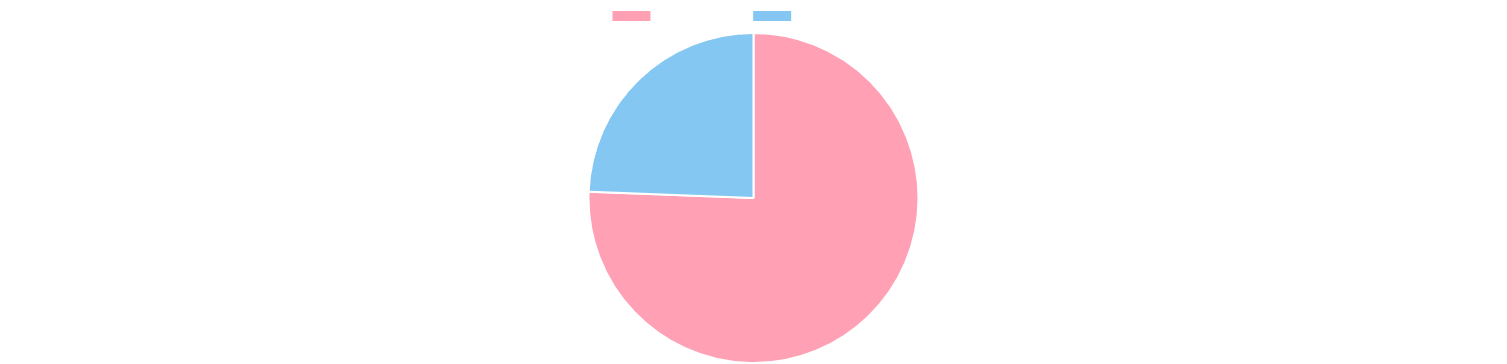

### **Második profilozás**

In [28]:
SELECT TOP 3 diakaz as 'Diák azonosítója',COUNT(*) as 'Mennyi munkát vállalt'
FROM munka
WHERE DiakAz is not null
GROUP BY diakaz
ORDER BY 2 DESC

(3 rows affected)

Total execution time: 00:00:00.052

Diák azonosítója,Mennyi munkát vállalt
8,6
5,4
6,4


Az alábbi diagrammon az látható, hogy diákzonosító alapján ki az a három diák, aki a legtöbb munkát vállalja.

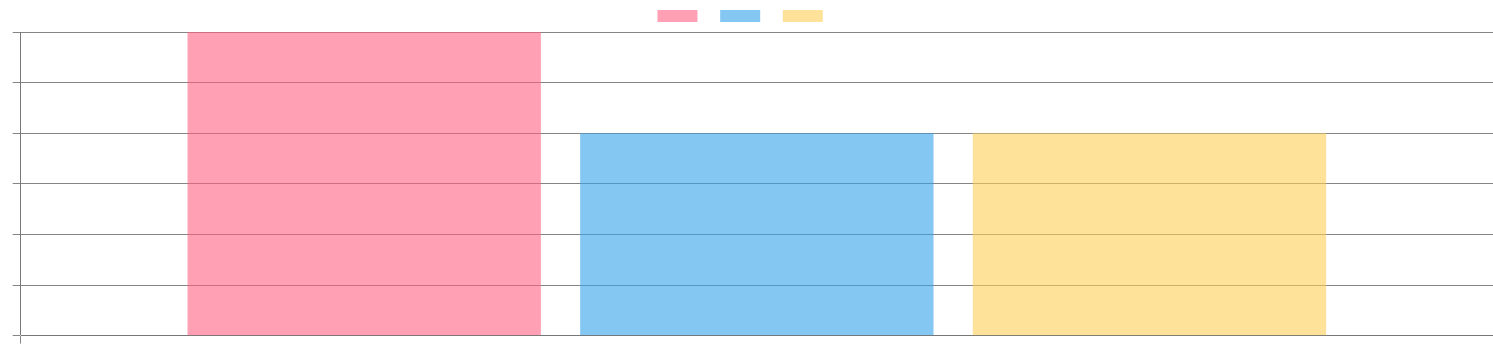

## **Harmadik profilozás:**

In [29]:
SELECT COUNT(DISTINCT diakAz) AS 'Foglalkoztatott diákok száma'
FROM munka
WHERE diakAz IS NOT NULL

(1 row affected)

Total execution time: 00:00:00.081

Foglalkoztatott diákok száma
10


A fentebbi lekérdezésben pedig az látható, hogy mennyi egyedi diakazonosító található meg a diakAz oszlopban.

## **Óradíj oszlop profilozása:**

### **Első profilozás:**

In [34]:
SELECT MIN(oradij) AS 'Minimum fizetés',
       MAX(oradij) AS 'Maximum fizetés',
       AVG(oradij) AS 'Átlag fizetés'
FROM munka
WHERE oradij IS NOT NULL

(1 row affected)

Total execution time: 00:00:00.082

Minimum fizetés,Maximum fizetés,Átlag fizetés
200,500,346


Az alábbi profilozásban azt láthatjuk, hogy a minimum fizetés 200, a max 500 és átlagosan egy stabil 346-os fizetés van.  
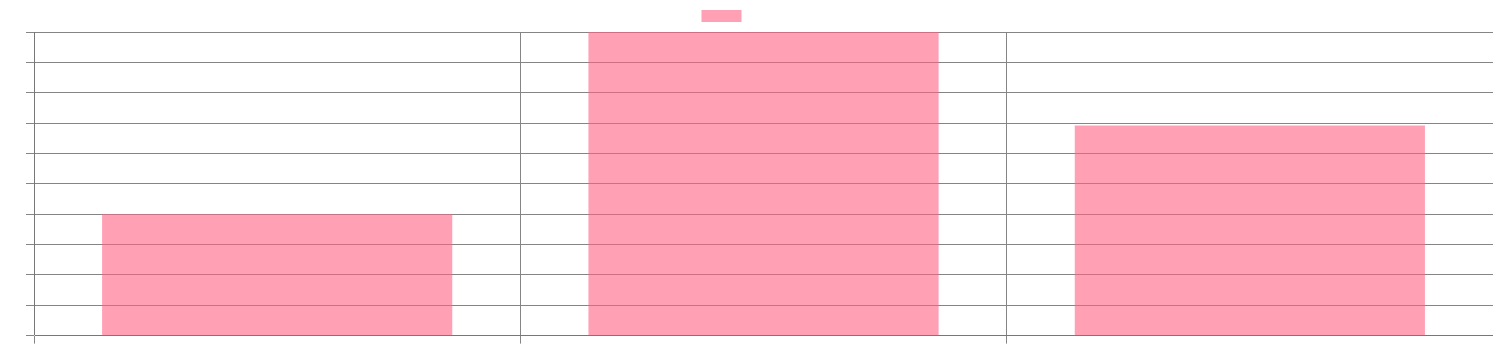

### **Második profilozás**

In [44]:
SELECT 
    SUM(CASE WHEN oradij < 325 THEN 1 ELSE 0 end) AS 'Nem megelelő összeg',
    SUM(CASE WHEN oradij BETWEEN 325 and 390 THEN 1 ELSE 0 end) AS 'Megfelelő összeg',
    SUM(CASE WHEN oradij > 390 THEN 1 ELSE 0 end) AS 'Túl nagy összeg'
FROM munka

(1 row affected)

Total execution time: 00:00:00.015

Nem megelelő összeg,Megfelelő összeg,Túl nagy összeg
20,3,18


Az alábbi profilozásban azt néztem meg, hogy mennyi olyan munka van ami belefér a 325-ös minimum, de 390-es maximum óradíjba, majd ebből csináltam egy fánkdiagrammot.  
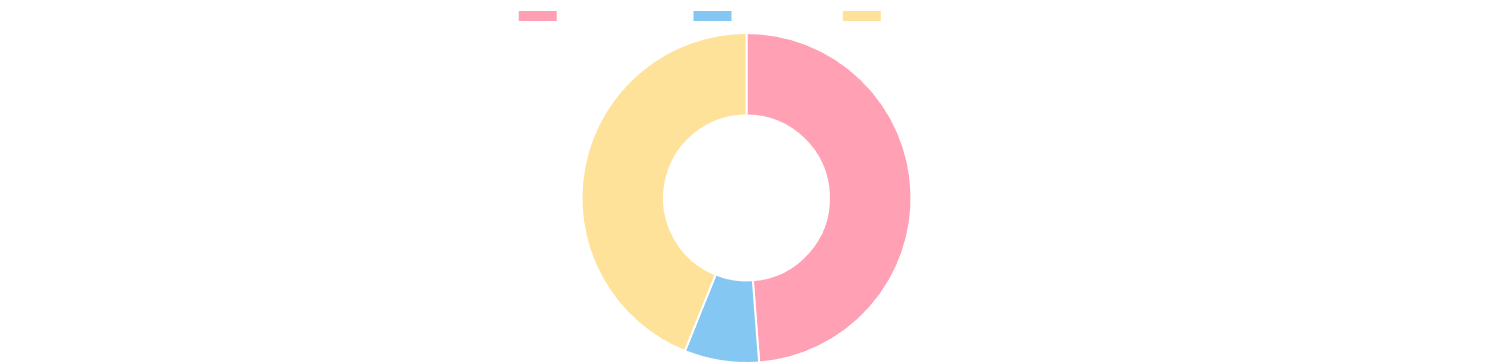

### **Harmadik profilozás**

In [40]:
SELECT DISTINCT oradij as 'Óradíjak'
FROM munka

(7 rows affected)

Total execution time: 00:00:00.020

oradij
200
250
300
350
400
450
500


Az alábbi profilozásban azt néztem meg, hogy milyen fizetések találhatóak az olszopban, jól látszik hogy a fizetések 50-esével nőnek és ez a diagramról is leolvasható  
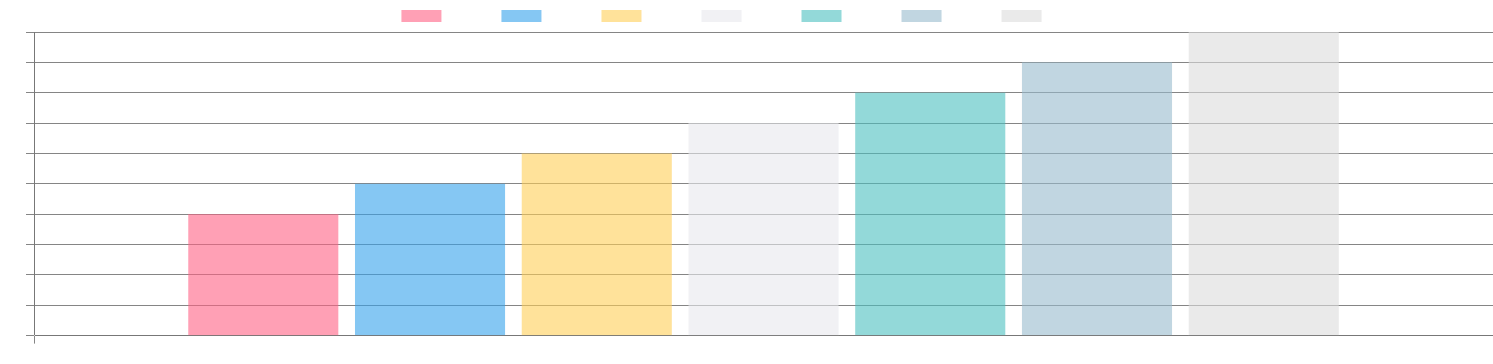